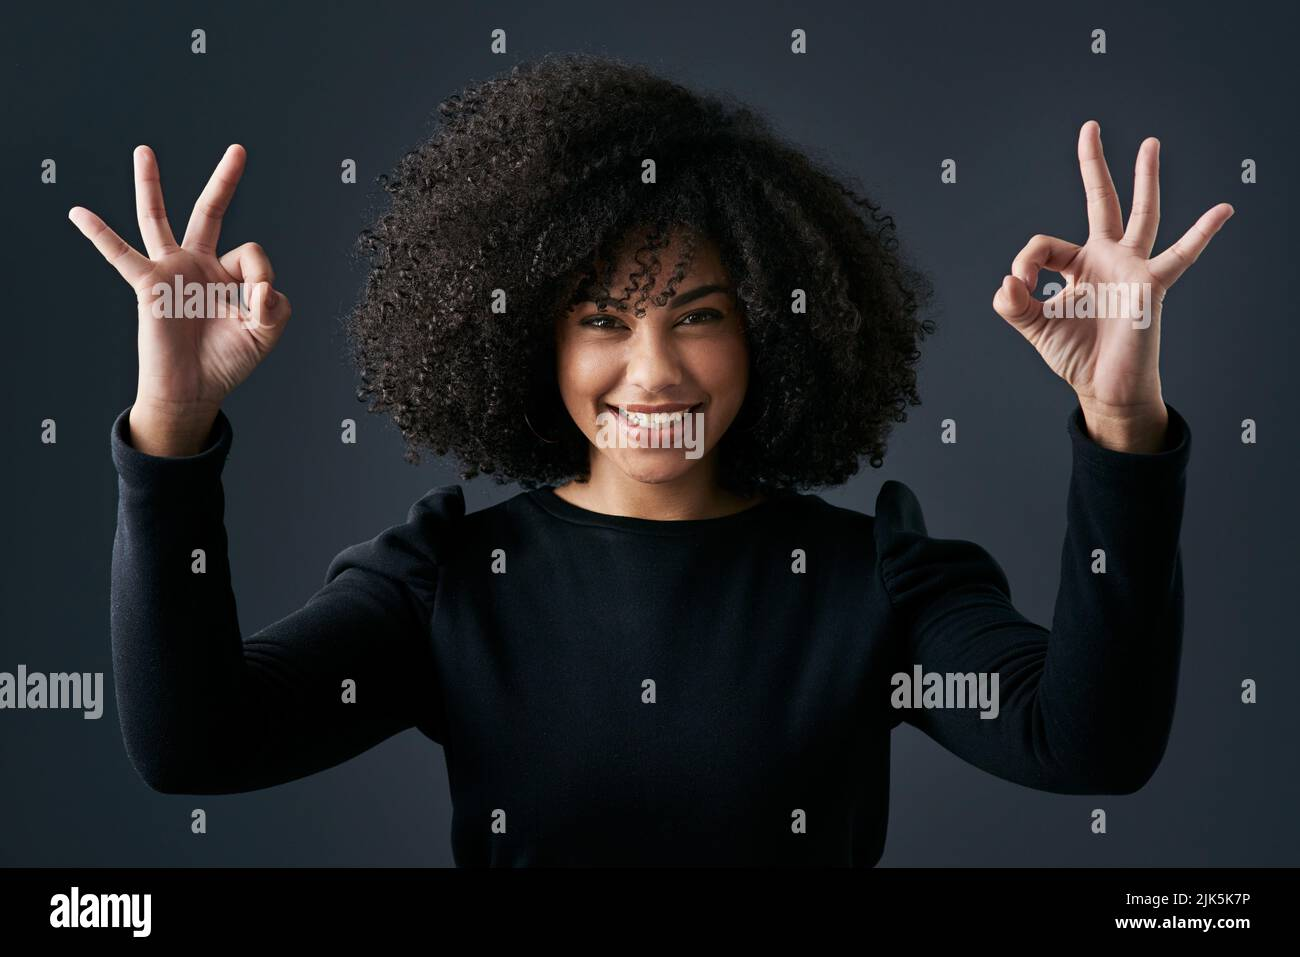

## Student Names and Registration Numbers

- Amarasinghe WLSK (EG_2020_3818)
- Aralugaswaththa CVCRP (EG_2020_3827)
- Madunica M (EG_2020_4051)
- Tharsi S (EG_2020_4232)

## Hand Gesture Recognition using Sign Language MNIST Dataset

In this AI project, we aim to develop a recognition system to identify hand gestures from the Sign Language MNIST dataset. This dataset comprises various hand gestures representing letters from the American Sign Language (ASL) alphabet, excluding 'J' and 'Z' due to their requirement for motion. By leveraging this dataset, we seek to build a robust visual recognition algorithm that can aid in the communication for the deaf and hard-of-hearing community.

### Dataset Overview

The dataset follows the structure of the original MNIST dataset, a widely recognized benchmark for image-based machine learning tasks. Each image in the dataset is a 28x28 pixel grayscale representation of a hand gesture, with pixel values ranging from 0 to 255. The dataset is organized in a CSV format where each row represents an image, starting with a label followed by 784 pixel values.

- **Training Data**: 27,455 images
- **Test Data**: 7,172 images
- **Classes**: 24 (letters A-Z, excluding 'J' and 'Z')

### Data Generation and Preprocessing

The images were generated by extending a smaller set of color images through an image processing pipeline using ImageMagick. The pipeline involved several steps:
- Cropping to focus on the hand region
- Converting to grayscale
- Resizing to 28x28 pixels
- Augmenting the data by applying various filters (Mitchell, Robidoux, Catrom, Spline, Hermite), adding random pixelation, adjusting brightness/contrast, and slight rotations.

This preprocessing aimed to create a diverse and challenging dataset that better simulates real-world conditions and provides a robust training set for machine learning models.

### Project Goals

1. **Exploratory Data Analysis (EDA)**: Understanding the distribution of the data, visualizing the images, and identifying any patterns or anomalies.
2. **Data Preprocessing**: Cleaning and preparing the data for model training, including normalization and augmentation.
3. **Model Development**: Implementing various machine learning models, such as Convolutional Neural Networks (CNNs), to accurately recognize hand gestures.
4. **Evaluation and Optimization**: Assessing model performance using metrics like accuracy, precision, and recall, and fine-tuning the models for better results.

### Significance

Developing an accurate hand gesture recognition system has significant practical applications. It can enhance communication for the deaf and hard-of-hearing community, provide new benchmarks for computer vision research, and potentially be implemented in affordable, portable devices like Raspberry Pi for real-time translation.

By the end of this project, we aim to deliver a high-performing gesture recognition system that can serve as a foundation for further developments in assistive technologies and advanced computer vision applications.

# Importing Libraries

In this code cell, we import necessary libraries for our machine learning project using Keras and TensorFlow.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Train datasets

We start by reading the training dataset using Pandas `read_csv` function.

In [4]:
# Train datasets

train_df = pd.read_csv("Dataset/sign_mnist_train.csv")

# Test datasets

test_df = pd.read_csv("Dataset/sign_mnist_test.csv")

# Displaying Information about the Training Dataset

We use the `info()` method to get a concise summary of the training dataset `train_df`.

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


# Displaying Information about the Test Dataset

To obtain a summary of the test dataset `test_df`, we utilize the `info()` method.

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


# Displaying Information about the Training Dataset

We use the `info()` method to get a concise summary of the training dataset `train_df`.

In [7]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


# Displaying the First 6 Rows of the Training Dataset

To examine the initial rows of the training dataset `train_df`, we use the `head()` method with an argument specifying the number of rows to display.

In [8]:
train_df.head(6)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255


# Creating Training Labels and Dataset

We extract the training labels and dataset from `train_df`.

In [9]:
train_label=train_df['label']
train_label.head()
trainset=train_df.drop(['label'],axis=1)
trainset.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


# Preparing Training Data (X_train)

We prepare the training data `X_train` from `trainset`.

In [10]:
X_train = trainset.values
X_train = trainset.values.reshape(-1,28,28,1)
print(X_train.shape)

(27455, 28, 28, 1)


# Creating Test Labels (test_label) and Test Dataset (X_test)

We extract the test labels and dataset from `test_df`.

In [9]:
test_label=test_df['label']
X_test=test_df.drop(['label'],axis=1)
print(X_test.shape)
X_test.head()

(7172, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


# Encoding Labels (y_train and y_test) using LabelBinarizer

We encode the labels (`y_train` and `y_test`) using `LabelBinarizer` from `sklearn.preprocessing`.

In [10]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
y_train=lb.fit_transform(train_label)
y_test=lb.fit_transform(test_label)

# Encoded Training Labels (y_train)

After encoding using `LabelBinarizer`, `y_train` now contains the transformed binary vectors representing the training labels.

In [11]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

# Reshaping Test Dataset (X_test)

We reshape the test dataset `X_test` to match the format required for convolutional neural networks (CNNs).

In [12]:
X_test=X_test.values.reshape(-1,28,28,1)

# Shapes of Data Arrays

We print the shapes of `X_train`, `y_train`, `X_test`, and `y_test` to verify their dimensions.

In [13]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(27455, 28, 28, 1) (27455, 24) (7172, 28, 28, 1) (7172, 24)


# Normalizing Test Data (X_test)

We normalize the pixel values of `X_test` to match the range used for training.

In [14]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 0,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  shear_range=0,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

X_test=X_test/255

# Preview of Dataset Images

We display a preview of selected images from `X_train` with their corresponding labels.

Text(0.5, 1.0, 'label: 13  letter: M')

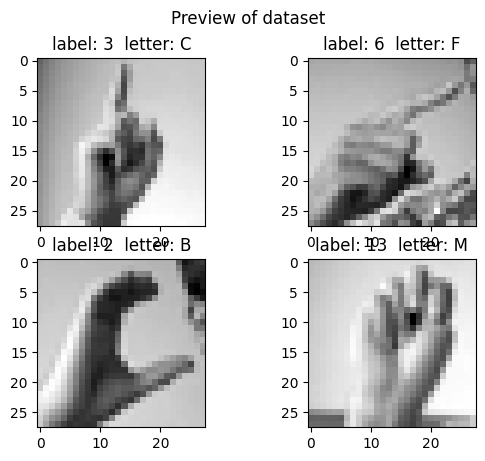

In [15]:
fig,axe=plt.subplots(2,2)
fig.suptitle('Preview of dataset')
axe[0,0].imshow(X_train[0].reshape(28,28),cmap='gray')
axe[0,0].set_title('label: 3  letter: C')
axe[0,1].imshow(X_train[1].reshape(28,28),cmap='gray')
axe[0,1].set_title('label: 6  letter: F')
axe[1,0].imshow(X_train[2].reshape(28,28),cmap='gray')
axe[1,0].set_title('label: 2  letter: B')
axe[1,1].imshow(X_train[4].reshape(28,28),cmap='gray')
axe[1,1].set_title('label: 13  letter: M')

# Frequency of Each Label in Training Data

We visualize the frequency of each label in `train_label` using a count plot.

Text(0.5, 1.0, 'Frequency of each label')

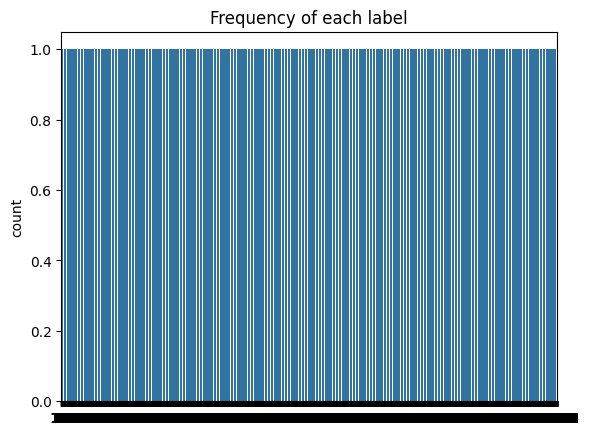

In [16]:
sns.countplot(train_label)
plt.title("Frequency of each label")

# Creating Convolutional Neural Network (CNN) Model

We define a sequential model (`model`) for a convolutional neural network using Keras.

In [17]:
model=Sequential()
model.add(Conv2D(128,kernel_size=(5,5),
                 strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Conv2D(64,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
model.add(Conv2D(32,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
          
model.add(Flatten())

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Model Summary

The `summary()` method provides an overview of the model architecture, including the type and number of layers, output shapes, and number of parameters.

In [18]:
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=24,activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 128)    │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 32)       │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │        12,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,352 (1.22 MB)

 Trainable params: 319,352 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

# Compiling the Model

We compile the Keras model (`model`) with specified optimizer, loss function, and metrics.

In [19]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Fitting the Model

We fit the Keras model (`model`) to the training data using `train_datagen.flow()` for data augmentation.

In [20]:
model.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 35,
          validation_data=(X_test,y_test),
          shuffle=1
         )

Epoch 1/35


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


138/138 ━━━━━━━━━━━━━━━━━━━━ 27s 182ms/step - accuracy: 0.0695 - loss: 3.1182 - val_accuracy: 0.3311 - val_loss: 2.1848
Epoch 2/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 24s 169ms/step - accuracy: 0.2643 - loss: 2.3563 - val_accuracy: 0.5639 - val_loss: 1.3625
Epoch 3/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 23s 166ms/step - accuracy: 0.4340 - loss: 1.7429 - val_accuracy: 0.6309 - val_loss: 1.0868
Epoch 4/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 23s 162ms/step - accuracy: 0.5508 - loss: 1.3647 - val_accuracy: 0.6958 - val_loss: 0.9119
Epoch 5/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 29s 211ms/step - accuracy: 0.6232 - loss: 1.1193 - val_accuracy: 0.6953 - val_loss: 0.7754
Epoch 6/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 25s 176ms/step - accuracy: 0.6711 - loss: 0.9642 - val_accuracy: 0.8031 - val_loss: 0.5450
Epoch 7/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 25s 182ms/step - accuracy: 0.7252 - loss: 0.8121 - val_accuracy: 0.8694 - val_loss: 0.3841
Epoch 8/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 29s 209ms/step - accuracy: 0.7607 - loss: 0.7025 - val

# Evaluating the Model on Test Data

We evaluate the trained Keras model (`model`) on the test data (`X_test` and `y_test`).

In [21]:
(ls,acc)=model.evaluate(x=X_test,y=y_test)

225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9899 - loss: 0.0377


# Printing Model Accuracy

We print the accuracy of the trained model (`model`) on the test data.

In [22]:
print('MODEL ACCURACY = {}%'.format(acc*100))

MODEL ACCURACY = 99.02397990226746%


# https://www.kaggle.com/code/sayakdasgupta/sign-language-classification-cnn-99-40-accuracy/notebook

# Function to Match Label to Letter

We define a function `getLetter(result)` to map predicted class indices to their corresponding letters.

In [23]:
# Create function to match label to letter

def getLetter(result):
  classLabels ={
      0:'A',
      1:'B',
      2:'C',
      3:'D',
      4:'E',
      5:'F',
      6:'G',
      7:'H',
      8:'I',
      9:'K',
      10:'L',
      11:'M',
      12:'N',
      13:'O',
      14:'P',
      15:'Q',
      16:'R',
      17:'S',
      18:'T',
      19:'U',
      20:'V',
      21:'W',
      22:'X',
      23:'Y',
      24:'Z'}

  try:
    res = int(result)
    return classLabels[res]
  except:
    return "Error"

# Hand Gesture Recognition Using Webcam

We demonstrate real-time hand gesture recognition using OpenCV and a pre-trained model.

In [24]:
import numpy as np
import cv2

# Assuming model and getLetter are defined before this code

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Define region of interest (ROI)
    roi = frame[100:400, 320:620]
    cv2.imshow('roi', roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)

    cv2.imshow('roi scaled and gray', roi)
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (0, 255, 0), 5)

    roi = roi.reshape(-1, 28, 28, 1)

    # Use predict method instead of predict_classes
    predictions = model.predict(roi)
    predicted_class = np.argmax(predictions[0])

    result = str(predicted_class)
    cv2.putText(copy, getLetter(result), (320, 90), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.imshow('frame', copy)

    if cv2.waitKey(1) == 13:  # Press 'Enter' key to break the loop
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━